## Feature Standardization
### This notebook outlines the Feature Standardization feature of Scikit-learn.
- Scale
- StandardScaler



### Import the relevant libraries to use

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the data into dataframe

In [5]:
# Read training features into X_train
X_train=pd.read_csv('X_train.csv')
# Read training target into Y_train
Y_train=pd.read_csv('Y_train.csv')

# Read testing features into X_test
X_test=pd.read_csv('X_test.csv')
# Read testing target into Y_test
Y_test=pd.read_csv('Y_test.csv')

# Display the top 5 rows
print(X_train.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

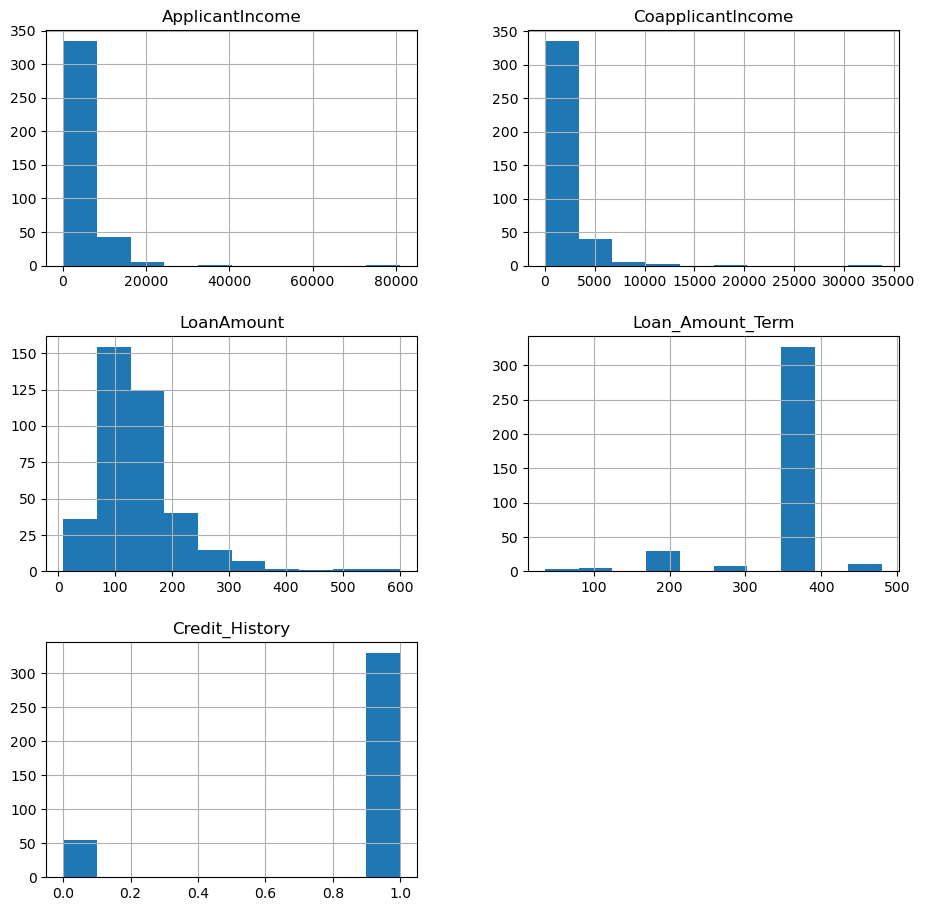

In [6]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
             .index.values].hist(figsize=[11,11])

### Import Scale, Logistic Regression classifier and Accuracy Score

In [8]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Scale

In [10]:
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

### Create a Logistic Regresssion Model

In [12]:
log=LogisticRegression(penalty='l2',C=.01)

### Fit the model

In [14]:
log.fit(X_train_scale,Y_train)

C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01)

### Checking the model's accuracy

In [16]:
accuracy_score(Y_test,log.predict(X_test_scale))

0.75

## StandardScaler from Preprocessing

In [18]:
from sklearn import preprocessing
import numpy as np

In [19]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [20]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [21]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [22]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

## Pipeline

In [24]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
X, y = make_classification(random_state=42)
print(X.shape, y.shape)

(100, 20) (100,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 20) (25, 20) (75,) (25,)


In [27]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [28]:
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [29]:
pipe.score(X_test, y_test)

0.96

## Try applying the same Pipeline to our loan prediction dataset
- 1. Import necessary libraries
- 2. Prepare the loan prediction dataset
- 3. Split the dataset
- 4. Create a pipeline with StandardScaler and Logistic Regression Model
- 5. Train the model
- 4. Check accuracy of this model

### Import necessary libraries

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Read the loan prediction dataset

In [34]:
# Read training features into X_train
X_train=pd.read_csv('X_train.csv')
# Read training target into Y_train
Y_train=pd.read_csv('Y_train.csv')

# Read testing features into X_test
X_test=pd.read_csv('X_test.csv')
# Read testing target into Y_test
Y_test=pd.read_csv('Y_test.csv')

# Display the top 5 rows
print(X_train.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

### Sanity check: Print the shapes of the data files

In [36]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(384, 12) (96, 12) (384, 1) (96, 1)


### Choose columns to apply Standardization

In [38]:
X_train_numeric=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_numeric=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

### Make the pipeline with StandardScaler and Logistic Regression

In [40]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

### Fit the model

In [42]:
pipe.fit(X_train_numeric, Y_train)

C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Accuracy

In [44]:
pipe.score(X_test_numeric, Y_test)

0.75

## Try applying the same Scale to Support Vector Machine pipeline
- 1. Import necessary libraries
- 2. Prepare the loan prediction dataset
- 3. Split the dataset
- 4. Create a pipeline with StandardScaler and Support Vector Machine Model
- 5. Train the model
- 6. Check accuracy of this model

### Import necessary libraries

In [99]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Read the dataset

In [102]:
# Read training features into X_train
X_train=pd.read_csv('X_train.csv')
# Read training target into Y_train
Y_train=pd.read_csv('Y_train.csv')

# Read testing features into X_test
X_test=pd.read_csv('X_test.csv')
# Read testing target into Y_test
Y_test=pd.read_csv('Y_test.csv')

### Sanity Check: Display the shapes of data files

In [105]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(384, 12) (96, 12) (384, 1) (96, 1)


### Choose columns to standardize

In [108]:
X_train_numeric=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_numeric=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

### Create pipeline

In [111]:
pipe = make_pipeline(StandardScaler(), svm.SVC())

### Train the model

In [114]:
pipe.fit(X_train_numeric, Y_train)

C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

### Accuracy

In [116]:
pipe.score(X_test_numeric, Y_test)

0.7291666666666666

### Which is the better Pipeline?